## Clustering Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

#### Distance

In [2]:
data = pd.DataFrame({"x1":[1,2,3,5,0,2], "x2":[1,4,2,3,2,5]})
data

,x1,x2
0,1,1
1,2,4
2,3,2
3,5,3
4,0,2
5,2,5


In [3]:
squareform(pdist(data, metric='euclidean'))

array([[0.        , 3.16227766, 2.23606798, 4.47213595, 1.41421356,
        4.12310563],
       [3.16227766, 0.        , 2.23606798, 3.16227766, 2.82842712,
        1.        ],
       [2.23606798, 2.23606798, 0.        , 2.23606798, 3.        ,
        3.16227766],
       [4.47213595, 3.16227766, 2.23606798, 0.        , 5.09901951,
        3.60555128],
       [1.41421356, 2.82842712, 3.        , 5.09901951, 0.        ,
        3.60555128],
       [4.12310563, 1.        , 3.16227766, 3.60555128, 3.60555128,
        0.        ]])

In [4]:
squareform(pdist(data, metric='cityblock'))

array([[0., 4., 3., 6., 2., 5.],
       [4., 0., 3., 4., 4., 1.],
       [3., 3., 0., 3., 3., 4.],
       [6., 4., 3., 0., 6., 5.],
       [2., 4., 3., 6., 0., 5.],
       [5., 1., 4., 5., 5., 0.]])

In [5]:
squareform(pdist(data, metric='cityblock'))

array([[0., 4., 3., 6., 2., 5.],
       [4., 0., 3., 4., 4., 1.],
       [3., 3., 0., 3., 3., 4.],
       [6., 4., 3., 0., 6., 5.],
       [2., 4., 3., 6., 0., 5.],
       [5., 1., 4., 5., 5., 0.]])

### Hierarchical clustering

#### Single linkage Method

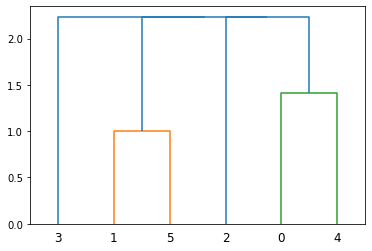

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

clust_single = linkage(data, method='single')

dendrogram(clust_single)
plt.show()

In [7]:
np.round(squareform(pdist(data, metric='euclidean')),2)

array([[0.  , 3.16, 2.24, 4.47, 1.41, 4.12],
       [3.16, 0.  , 2.24, 3.16, 2.83, 1.  ],
       [2.24, 2.24, 0.  , 2.24, 3.  , 3.16],
       [4.47, 3.16, 2.24, 0.  , 5.1 , 3.61],
       [1.41, 2.83, 3.  , 5.1 , 0.  , 3.61],
       [4.12, 1.  , 3.16, 3.61, 3.61, 0.  ]])

#### Complete linkage method

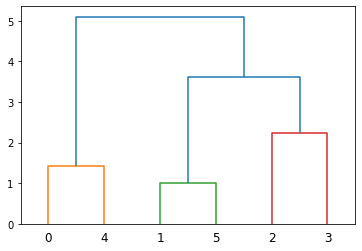

In [8]:
clust_complete = linkage(data, method='complete')

dendrogram(clust_complete)
plt.show()

#### Average linkage method

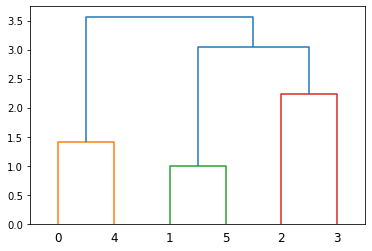

In [9]:
clust_avg = linkage(data, method='average')

dendrogram(clust_avg)
plt.show()

#### Ward's method

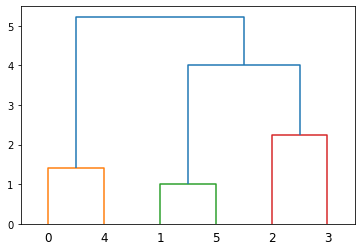

In [10]:
clust_ward = linkage(data, method='ward')

dendrogram(clust_ward)
plt.show()

#### Number of Clusters

In [11]:
cut_tree(clust_ward, 3)

array([[0],
       [1],
       [2],
       [2],
       [0],
       [1]])

### Non-Hierarchical Methods